In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from skimage import exposure
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


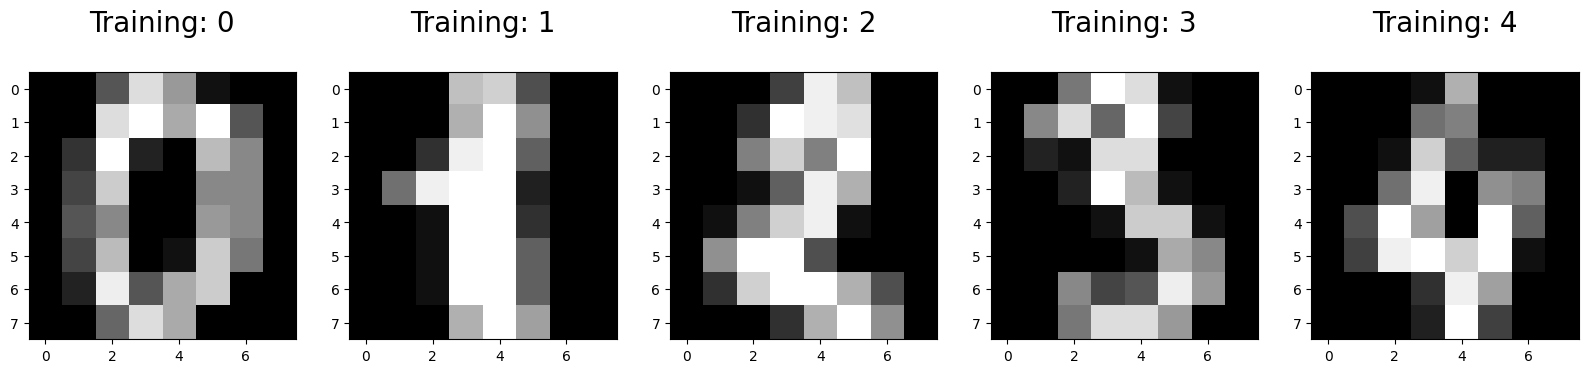

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
X = digits.data
y = digits.target
print("X: ", X)
print("y: ", y)

X:  [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y:  [0 1 2 ... 8 9 8]


In [5]:
#Reshape  the images to 2D arrays
X = X.reshape(-1, 8, 8)
X

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:

# Split the data in TRAIN and TEST
 # - Add a comment explaining the purpose of the TRAIN and Test sets

# Preprocess the images
X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

X_preprocessed # sets the numbers between 0 and 1

[array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
        0.06666667, 0.        , 0.        , 0.        , 0.        ,
        0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
        0.        , 0.        , 0.2       , 1.        , 0.13333333,
        0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
        0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
        0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
        0.        , 0.        , 0.6       , 0.53333333, 0.        ,
        0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
        0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
        0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
        0.        , 0.        , 0.        , 0.4       , 0.86666667,
        0.66666667, 0.        , 0.        , 0.        ]),
 array([0.    , 0.    , 0.    , 0.75  , 0.8125, 0.3125, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.6875, 1.    , 0.5625

In [8]:
X_preprocessed = np.array(X_preprocessed) # convert to 2d array
X_preprocessed[0]


array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Following the lecture, the steps are as follows

1. Load the data
2. Assign X and y
3. Apply contrast stretching based on a low and high percentile (pre processing)
We extra the bottom 2% and also the top 2% (or 98%)
What this means is that the bottom 2%, if it can get darker, then do it.
If the top 2% an get brighter then increase it
4. Flatten the rescaled image back to a 1D object so that it can be used by the algorithm
5. Split the collection into Train and Test. This is so that the model can learn from the training set, and we can test it using the testing set to see if its learnt something

In [10]:
# Split
r = 42
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, train_size=0.2, random_state=r) # 80/20 for large sets

# initialise
rf_classifier = RandomForestClassifier(random_state=r)

# fit
rf_classifier.fit(X_train, y_train)

# predict
y_pred = rf_classifier.predict(X_test)
# print

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [11]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [12]:
# Train the classifier with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

# Make predictions using the best classifier
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the performance of the best classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Show metrics
print('Random Forest Classifier:')
print('Accuracy: {:.2f}'.format(accuracy_best))
print('Precision: {:.2f}'.format(precision_best))
print('Recall: {:.2f}'.format(recall_best))
print('F1 Score: {:.2f}'.format(f1_best))


Random Forest Classifier:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


In [13]:
# Tune by testing - 
# remove max depth, 
# add min_samples_leaf (failed)
# Check n_jobs (best is 2)
param_grid = {
    'n_estimators': [200],
    'n_jobs': [2],
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [200], 'n_jobs': [2]})

In [14]:
#Get results again...

# Train the classifier with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

# Make predictions using the best classifier
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the performance of the best classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

# Show metrics
print('Random Forest Classifier:')
print('Accuracy: {:.2f}'.format(accuracy_best))
print('Precision: {:.2f}'.format(precision_best))
print('Recall: {:.2f}'.format(recall_best))
print('F1 Score: {:.2f}'.format(f1_best))


Random Forest Classifier:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


In [15]:

print("Confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("Accuracy score: ", accuracy_score(y_pred, y_test))


Confusion matrix: 
 [[133   0   1   1   1   1   2   0   0   0]
 [  0 137   1   0   0   0   2   0   6   0]
 [  0   6 121   4   0   0   0   0   2   0]
 [  0   0   1 129   0   0   0   0   0   1]
 [  1   0   0   0 134   1   0   1   0   0]
 [  0   0   0   1   0 140   0   0   3   3]
 [  0   0   0   0   0   1 146   0   0   0]
 [  0   0   0   1   5   0   0 147   2   6]
 [  0   1  20   9   0   1   0   0 120   2]
 [  0   0   0   2   0   5   0   1   2 134]]
Accuracy score:  0.9325452016689847
